# Bot Tweet/Article Detection System

### 1.1 The Topic:

Now more than ever with the rise of social media, there has been a massive increase in the spread of false information. The way that this information is spread is through botnets, or basically, fake accounts that are created for the sole purpose of spreading this information.

This will be a categorical analysis and will be training a model to detect whether a tweet/news article is fake or real. I might add some numerical analysis if I have time.

### 1.2 The Data:

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

The data comes from Kaggle. They have two csv's with one being "True" or real articles and the other consisting of "Fake" articles. I am considering bringing in more data down the road to make it more interesting, but for now, this will due. 

The csv files consist of ~19,000 rows of data with four columns. The columns are:
"title" - title of the article
"text" - an excerpt from the article
"subject" - basically a categorical showing of what the article is (e.g. world news, government news, etc.)
"date" - date of the article being published

All of the data types are initially in string form.

### 2. Data Cleaning/EDA:

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading the files
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
#adding a column that will show a 0 for fake and 1 for real
fake['target'] = 0
true['target'] = 1 

In [4]:
#putting the files into a single pandas dataframe
data = pd.concat([fake, true]).reset_index(drop = True)
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
#Shuffling the data to make it where it is not all 0's then all 1's 
#This helps later on when training the model
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,target
0,Senator Flake: Trump can't win if he can't change,WASHINGTON (Reuters) - U.S. Senator Jeff Flake...,politicsNews,"August 9, 2016",1
1,"U.S. judge blocks transgender, abortion-relate...",(Reuters) - A federal judge in Texas on Saturd...,politicsNews,"January 1, 2017",1
2,Former Classmate: Trump Smacked His Son So Ha...,We ve all seen pictures of the Trumps in their...,News,"November 4, 2016",0
3,JUDGE GIVES ‘LEGAL PERSONHOOD’ TO MONKEYS: SHO...,Habeas Corpus for Animals???The animal person...,Government News,"Apr 25, 2015",0
4,80 YEAR OLD MAN Writes MUST READ Letter To RNC...,This letter was sent to 100% FED Up! by an ano...,politics,"Apr 13, 2016",0


I will be leaving all of the columns, because they will all be used eventually for different reasons and to possibly find trends beyond the initial scope, but the data in these columns does need to be cleaned.

In [6]:
#Making all of the data lowercase for easier comparison
data['text'] = data['text'].apply(lambda x: x.lower())
data['title'] = data['title'].apply(lambda x: x.lower())
data['subject'] = data['subject'].apply(lambda x: x.lower())
data.head()

,title,text,subject,date,target
0,senator flake: trump can't win if he can't change,washington (reuters) - u.s. senator jeff flake...,politicsnews,"August 9, 2016",1
1,"u.s. judge blocks transgender, abortion-relate...",(reuters) - a federal judge in texas on saturd...,politicsnews,"January 1, 2017",1
2,former classmate: trump smacked his son so ha...,we ve all seen pictures of the trumps in their...,news,"November 4, 2016",0
3,judge gives ‘legal personhood’ to monkeys: sho...,habeas corpus for animals???the animal person...,government news,"Apr 25, 2015",0
4,80 year old man writes must read letter to rnc...,this letter was sent to 100% fed up! by an ano...,politics,"Apr 13, 2016",0


In [20]:
#This function is to get rid of punctuation. 
#We will do analysis on the data when punctuation is included, because it can be an indicator
#But early on, we will focus on the grammar and spelling
#Notice below that quotes will be left in due to the common use of false quotes/misinterpreted quotes
def rem_punc(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean = ''.join(all_list)
    return clean
data['text'] = data['text'].apply(rem_punc)
data['title'] = data['title'].apply(rem_punc)
data.head()

,title,text,subject,date,target
0,senator flake trump cant win if he cant change,washington reuters us senator jeff flake said...,politics,"August 9, 2016",1
1,us judge blocks transgender abortionrelated ob...,reuters a federal judge in texas on saturday ...,politics,"January 1, 2017",1
2,former classmate trump smacked his son so har...,we ve all seen pictures of the trumps in their...,news,"November 4, 2016",0
3,judge gives ‘legal personhood’ to monkeys shou...,habeas corpus for animalsthe animal personhoo...,government news,"Apr 25, 2015",0
4,80 year old man writes must read letter to rnc...,this letter was sent to 100 fed up by an anony...,politics,"Apr 13, 2016",0


### 2. Data Exploration
In the data exploration, we view the data in a couple different ways to make sure there aren't any factors that causing the data to be heavily biased/erroneous.

target
0    23481
1    21417
Name: text, dtype: int64


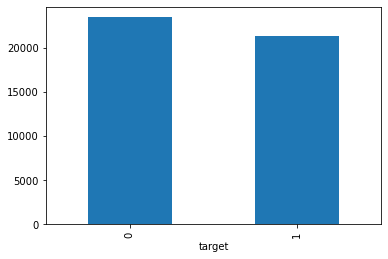

In [8]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

subject
government news     1570
middle-east          778
news                9050
politics           18113
us_news              783
worldnews          10145
Name: text, dtype: int64


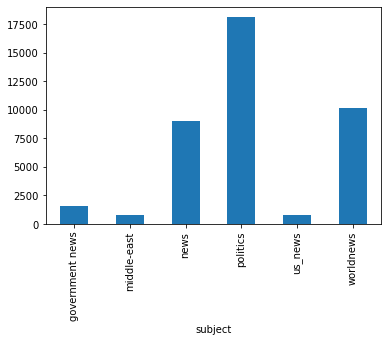

In [21]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Above, we are able to see that there are politics and politicsnews, which are the same, so we will change the politicsnews to just politics
We also know that in politics, there are left-wing and right-wing news media outlets. Due to this, 
we can't distinguish any important information without a right-wing news subject, so we will just go ahead and drop those

subject
government news     1570
middle-east          778
news                9050
politics           18113
us_news              783
worldnews          10145
Name: text, dtype: int64


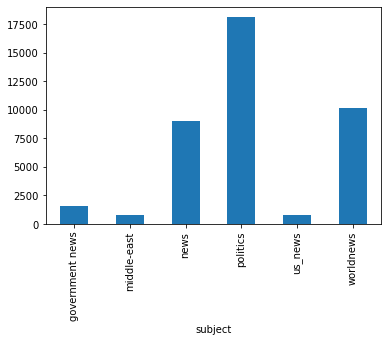

In [10]:

data['subject'] = data['subject'].str.replace('politicsnews','politics')
data = data[data.subject != "left-news"]
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Since we have cleaned the data and values have changed, I will briefly show all the same graphs in order again for updated information. Below, you can see the updated graphs. 

The first graph is important, because it shows how much of the data is true and how much is false. This gives a baseline to keep us honest and make sure the data isn't heavily skewed one way or the other in the beginning.

The second graph shows the distribution among sources. Obviously, politics is a significant contribution to this dataset. This will have to be taken into account when trying to find where the botnets are.

The second one shows where some problems can arise while looking, so we will have to take the percentage of fake and real articles based off of each industries total, rather than the overall total when viewing the sources.
 

target
0    19022
1    21417
Name: text, dtype: int64


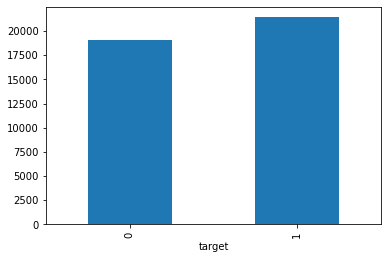

subject
government news     1570
middle-east          778
news                9050
politics           18113
us_news              783
worldnews          10145
Name: text, dtype: int64


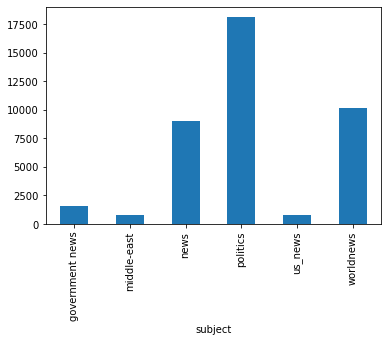

subject
government news     1570
middle-east          778
news                9050
politics           18113
us_news              783
worldnews          10145
Name: text, dtype: int64


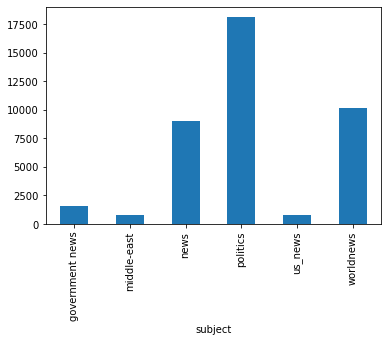

In [11]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

### 4. Model Approach

I will be detecting the most common terms from the "text" and seeing if it is a fake or real article, then placing the information I obtain into a classification model. I will also be using some logistic regression to determine how accurate the model ends up being.

Some of the issues will come from splitting the data properly for the model, because of the key words possibly having very even splits between fake and real articles. The other main issue that can't really be fixed without many hours of searching is, if the data is actually accurate in what is fake and real.

In [12]:
# I got the function to plot the confusion matrix from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn import metrics
import itertools
from sklearn.model_selection import train_test_split
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
  

                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [14]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.66%


Confusion matrix, without normalization


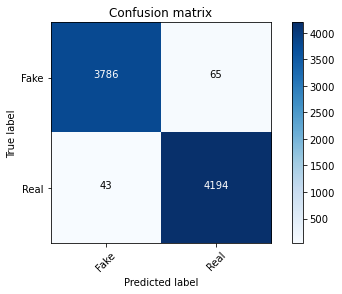

In [15]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.62%


Confusion matrix, without normalization


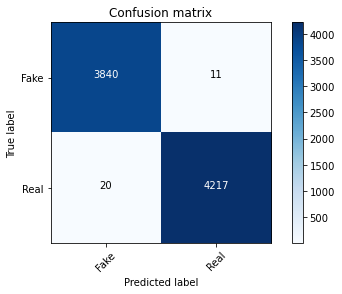

In [17]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [18]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.66%


Confusion matrix, without normalization


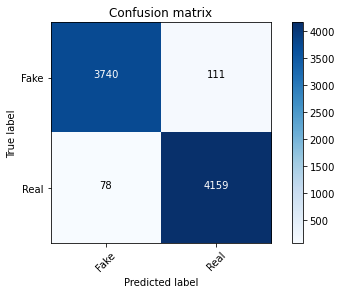

In [19]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

The three models that I ended up using were logistic regression, Decision Tree Classifier and a Random Forest Classifier. You may not have heard of the last two, because they are not from the class:
-The Decision Tree Classifier is a model that predicts the value of a target variable by learning simple decision rules
-The Random Forest Classifier is a model that more or less creates a multitude of decision trees during training then taking the average prediction of the individual trees as its output. This style may sound similar to something you have seen before, because it essentially the same idea as bootstrapping data.

The code for all of the different models turned out to be very accurate with the Decision Tree Classifier being the best at 99.62%. This is a highly impressive accuracy and means we would be able to spot what is real and what is fake over 99/100 times. 